### Decision Tree Model with Random Forest Classifier 

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
female_data=pd.read_csv('female_complete.csv')

In [3]:
female_data['Medal'] = female_data['Medal'].fillna('NA')

In [4]:
male_data=pd.read_csv('male_gdp.csv')
male_data['Medal'] = male_data['Medal'].fillna('NA')

In [5]:
female_swim = female_data[female_data['Sport'] == 'Badminton']

In [6]:
female_swim['Sport'].describe

<bound method NDFrame.describe of 13396    Badminton
13397    Badminton
13398    Badminton
13399    Badminton
13400    Badminton
           ...    
13892    Badminton
13893    Badminton
13894    Badminton
13895    Badminton
13896    Badminton
Name: Sport, Length: 501, dtype: object>

In [7]:
female_swim['Medal'].describe

<bound method NDFrame.describe of 13396        NA
13397        NA
13398        NA
13399        NA
13400        NA
          ...  
13892        NA
13893      Gold
13894      Gold
13895    Bronze
13896    Bronze
Name: Medal, Length: 501, dtype: object>

In [8]:
female_swim.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501 entries, 13396 to 13896
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      501 non-null    int64  
 1   Unnamed: 0_x    501 non-null    int64  
 2   ID              501 non-null    int64  
 3   Name            501 non-null    object 
 4   Sex             501 non-null    object 
 5   Age             501 non-null    float64
 6   Height          501 non-null    float64
 7   Weight          501 non-null    float64
 8   NOC             501 non-null    object 
 9   Games           501 non-null    object 
 10  Year            501 non-null    int64  
 11  Season          501 non-null    object 
 12  City            501 non-null    object 
 13  Sport           501 non-null    object 
 14  Event           501 non-null    object 
 15  Medal           501 non-null    object 
 16  Team            501 non-null    object 
 17  Unnamed: 0_y    501 non-null 

In [9]:
# Extract Response and Predictors
y = pd.DataFrame(female_swim["Medal"]).astype('category')
X = pd.DataFrame(female_swim[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

In [10]:
# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (375, 1) (375, 6)
Test Set  : (126, 1) (126, 6)


In [11]:
#"Age", "Weight", "Height","GDP","Population","GDP Per Capita"

### Decision Tree Model accounting for class imbalance (SMOTE) + GraphViz visualisation

In [12]:
train_data= pd.concat([X_train, y_train.reindex(X_train.index)], axis=1)
train_data

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
13559,23.0,64.0,166.0,6.200000e+12,1.276290e+08,48578.301170,Silver
13433,26.0,47.0,158.0,4.960000e+09,2.334690e+07,212.447942,NA
13885,29.0,58.0,169.0,5.323788e+10,7.127822e+06,7469.025247,NA
13574,22.0,65.0,175.0,3.070000e+11,5.731118e+06,53567.209749,NA
13524,22.0,70.0,171.0,1.960000e+12,1.296075e+09,1512.258164,Silver
...,...,...,...,...,...,...,...
13626,25.0,62.0,164.0,1.120000e+13,1.378665e+09,8123.800923,NA
13668,27.0,64.0,161.0,1.760000e+11,2.115404e+08,831.992262,NA
13483,25.0,61.0,169.0,1.960000e+12,1.296075e+09,1512.258164,Silver
13581,24.0,65.0,172.0,5.340000e+11,3.812576e+07,14006.278537,NA


In [13]:
NA_train_swim = train_data[train_data['Medal'] == 'NA']

Number of Medal Types : 4
NA        441
Gold       20
Silver     20
Bronze     20
Name: Medal, dtype: int64


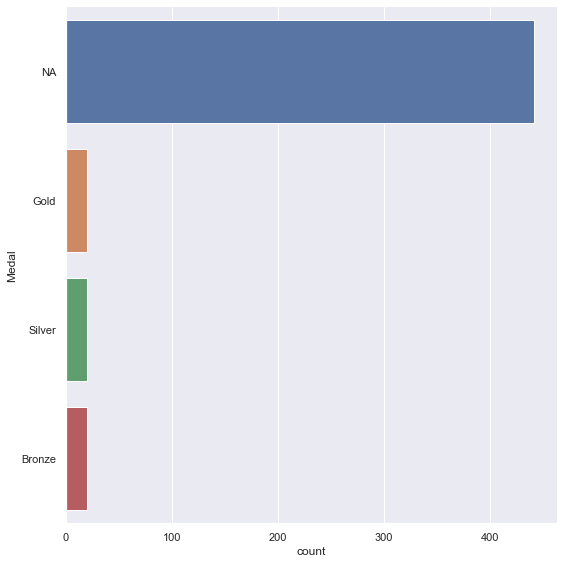

In [14]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(female_swim["Medal"].unique()))

# Pokemons of each Primary Type
print(female_swim["Medal"].value_counts())
sb.catplot(y = "Medal", data = female_swim, kind = "count", height = 8)

In [15]:
#train_data['Medal']=train_data['Medal'].replace('NA',0)
#train_data['Medal']=train_data['Medal'].replace('Gold',1)
#train_data['Medal']=train_data['Medal'].replace('Silver',1)
#train_data['Medal']=train_data['Medal'].replace('Bronze',1)
#train_data.head(20)
print(X_train.shape, y_train.shape)

(375, 6) (375, 1)


In [16]:
#Importing SMOTE
from imblearn.over_sampling import SMOTE
#Oversampling the data
smote = SMOTE()
X, y = smote.fit_resample(X_train, y_train)

print(X.shape, y.shape)

(1316, 6) (1316, 1)


In [17]:
SMOTE_sample= pd.concat([X, y.reindex(X.index)], axis=1)
SMOTE_sample

,Age,Weight,Height,GDP,Population,GDP Per Capita,Medal
0,23.000000,64.000000,166.000000,6.200000e+12,1.276290e+08,48578.301170,Silver
1,26.000000,47.000000,158.000000,4.960000e+09,2.334690e+07,212.447942,NA
2,29.000000,58.000000,169.000000,5.323788e+10,7.127822e+06,7469.025247,NA
3,22.000000,65.000000,175.000000,3.070000e+11,5.731118e+06,53567.209749,NA
4,22.000000,70.000000,171.000000,1.960000e+12,1.296075e+09,1512.258164,Silver
...,...,...,...,...,...,...,...
1311,26.649225,57.052326,168.806201,2.503469e+11,2.212055e+07,16956.289670,Silver
1312,25.153749,63.461667,171.846670,6.190968e+12,8.543108e+08,19286.618661,Silver
1313,27.095909,58.645779,161.549870,1.027123e+12,2.057929e+08,17877.983999,Silver
1314,24.602794,65.643713,162.547904,7.035938e+11,2.121990e+07,37030.258517,Silver


In [18]:
X_test

,Age,Weight,Height,GDP,Population,GDP Per Capita
13856,26.0,55.0,170.0,2.600000e+11,1.465966e+08,1773.575078
13533,21.0,59.0,169.0,4.070000e+11,6.886351e+07,5910.241525
13564,22.0,66.0,178.0,1.650000e+12,5.889251e+07,28017.143231
13582,28.0,65.0,172.0,5.000000e+11,3.806316e+07,13136.059840
13681,22.0,65.0,167.0,1.830000e+12,1.263066e+09,1448.855574
...,...,...,...,...,...,...
13876,23.0,57.0,166.0,4.890000e+12,1.268430e+08,38551.595279
13861,28.0,58.0,165.0,4.820000e+12,1.277610e+08,37726.692809
13634,27.0,61.0,165.0,3.050000e+11,4.773095e+06,63899.838574
13745,23.0,58.0,167.0,1.260000e+11,9.817958e+06,12833.625892


Number of Medal Types : 4
Bronze    329
Gold      329
NA        329
Silver    329
Name: Medal, dtype: int64


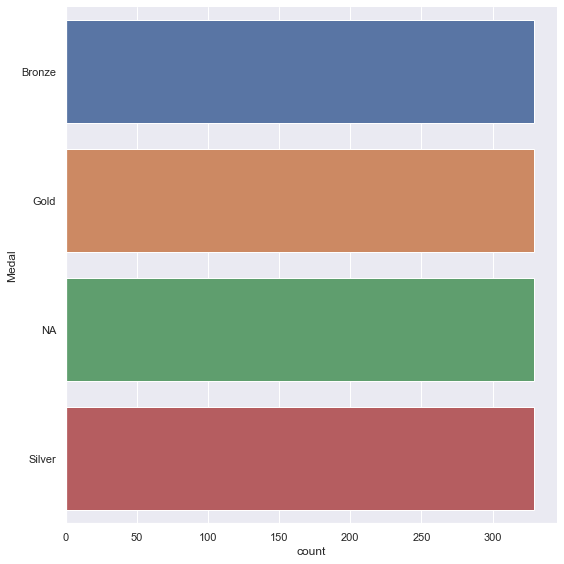

In [19]:
# Primary Types in the Dataset
print("Number of Medal Types :", len(SMOTE_sample["Medal"].unique()))

# Pokemons of each Primary Type
print(SMOTE_sample["Medal"].value_counts())
sb.catplot(y = "Medal", data = SMOTE_sample, kind = "count", height = 8)

Train Set : (987, 1) (987, 6)
Test Set  : (329, 1) (329, 6)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9949341438703141

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8814589665653495



<AxesSubplot:>

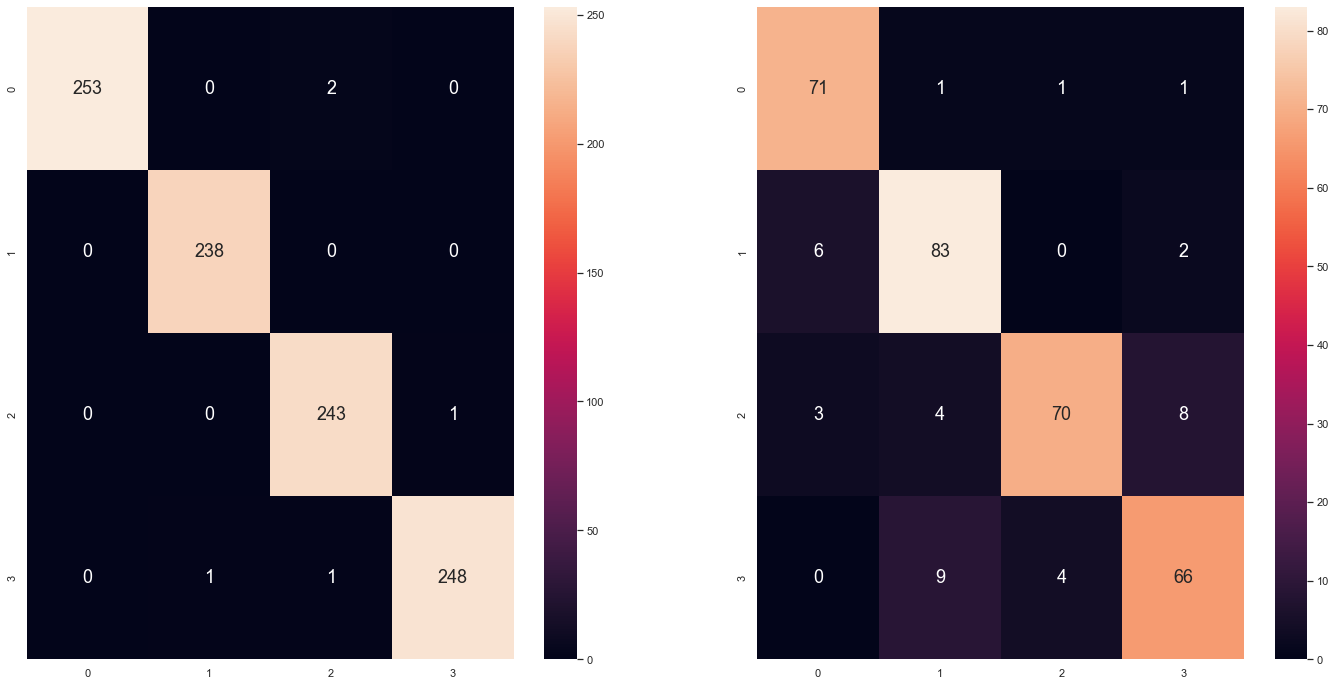

In [20]:
# Extract Response and Predictors
y_balanced = pd.DataFrame(SMOTE_sample["Medal"]).astype('category')
x_balanced = pd.DataFrame(SMOTE_sample[["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X1_train, X1_test, Y_train, Y_test = train_test_split(x_balanced, y_balanced, test_size = 0.25)

# Check the sample sizes
print("Train Set :", Y_train.shape, X1_train.shape)
print("Test Set  :", Y_test.shape, X1_test.shape)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Random Forest using Train Data
rforest = RandomForestClassifier(n_estimators = 100, max_depth = 12)  # create the object
rforest.fit(X1_train, Y_train.values.ravel())                         # train the model

# Predict Response corresponding to Predictors
Y_train_pred = rforest.predict(X1_train)
Y_test_pred = rforest.predict(X1_test)


#GOODNESS OF FIT

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X1_train, Y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X1_test, Y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(24, 12))
sb.heatmap(confusion_matrix(Y_train, Y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(Y_test, Y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Horizontal=actual, vertical=predict

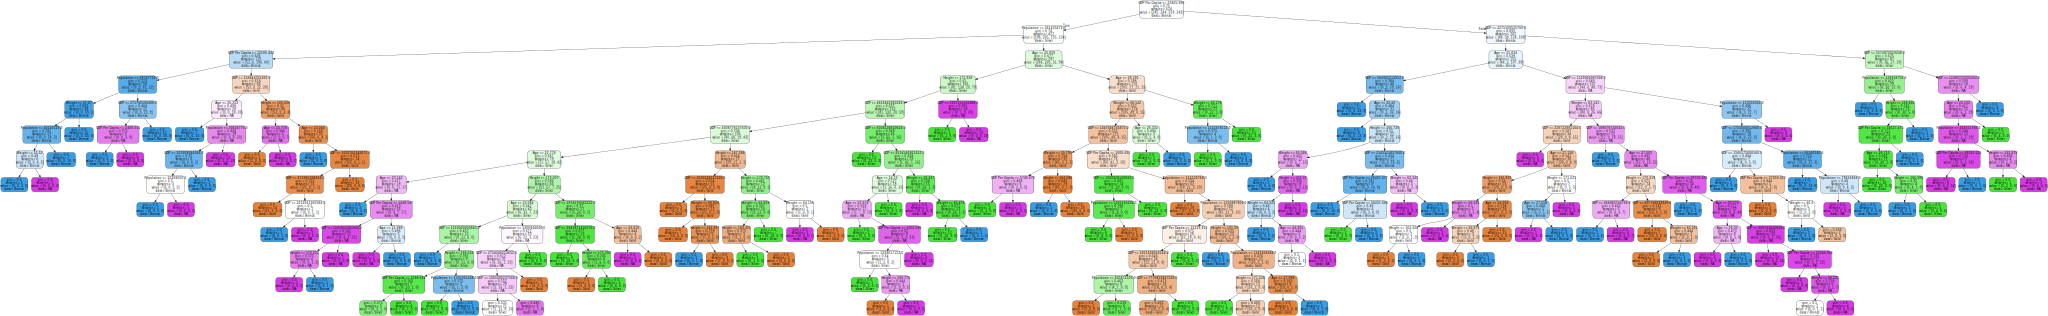

In [21]:
estimator = rforest.estimators_[5]

import graphviz

from sklearn import tree
feature_names = ["Age", "Weight", "Height","GDP","Population","GDP Per Capita"]
dot_data = tree.export_graphviz(estimator, out_file=None, filled=True, rounded = True, feature_names=["Age", "Weight", "Height","GDP","Population","GDP Per Capita"], class_names=['Gold', 'Silver', 'Bronze','NA'])
graph = graphviz.Source(dot_data)
graph

In [22]:
graph.render("Tree_female_BADMINTON")

'Tree_female_BADMINTON.pdf'

### Predictions

In [23]:
y_test_pred = rforest.predict(X_test)
print("Classification Accuracy \t:", rforest.score(X_test, y_test))

Classification Accuracy 	: 0.7777777777777778


<AxesSubplot:>

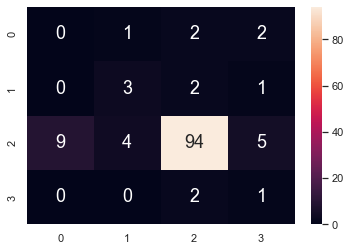

In [24]:
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})